In [5]:
# pip install imbalanced-learn
# pip install xgboost
# pip install pdpbox --user
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Reading the Data

In [6]:
df = pd.read_csv("dataset.csv")

In [7]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [8]:
print(df.dtypes)

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [10]:
print(f'The size of data is {df.shape}')

The size of data is (70692, 22)


In [11]:
print(f'The null values in the dataset are\n{df.isna().sum()}')

The null values in the dataset are
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


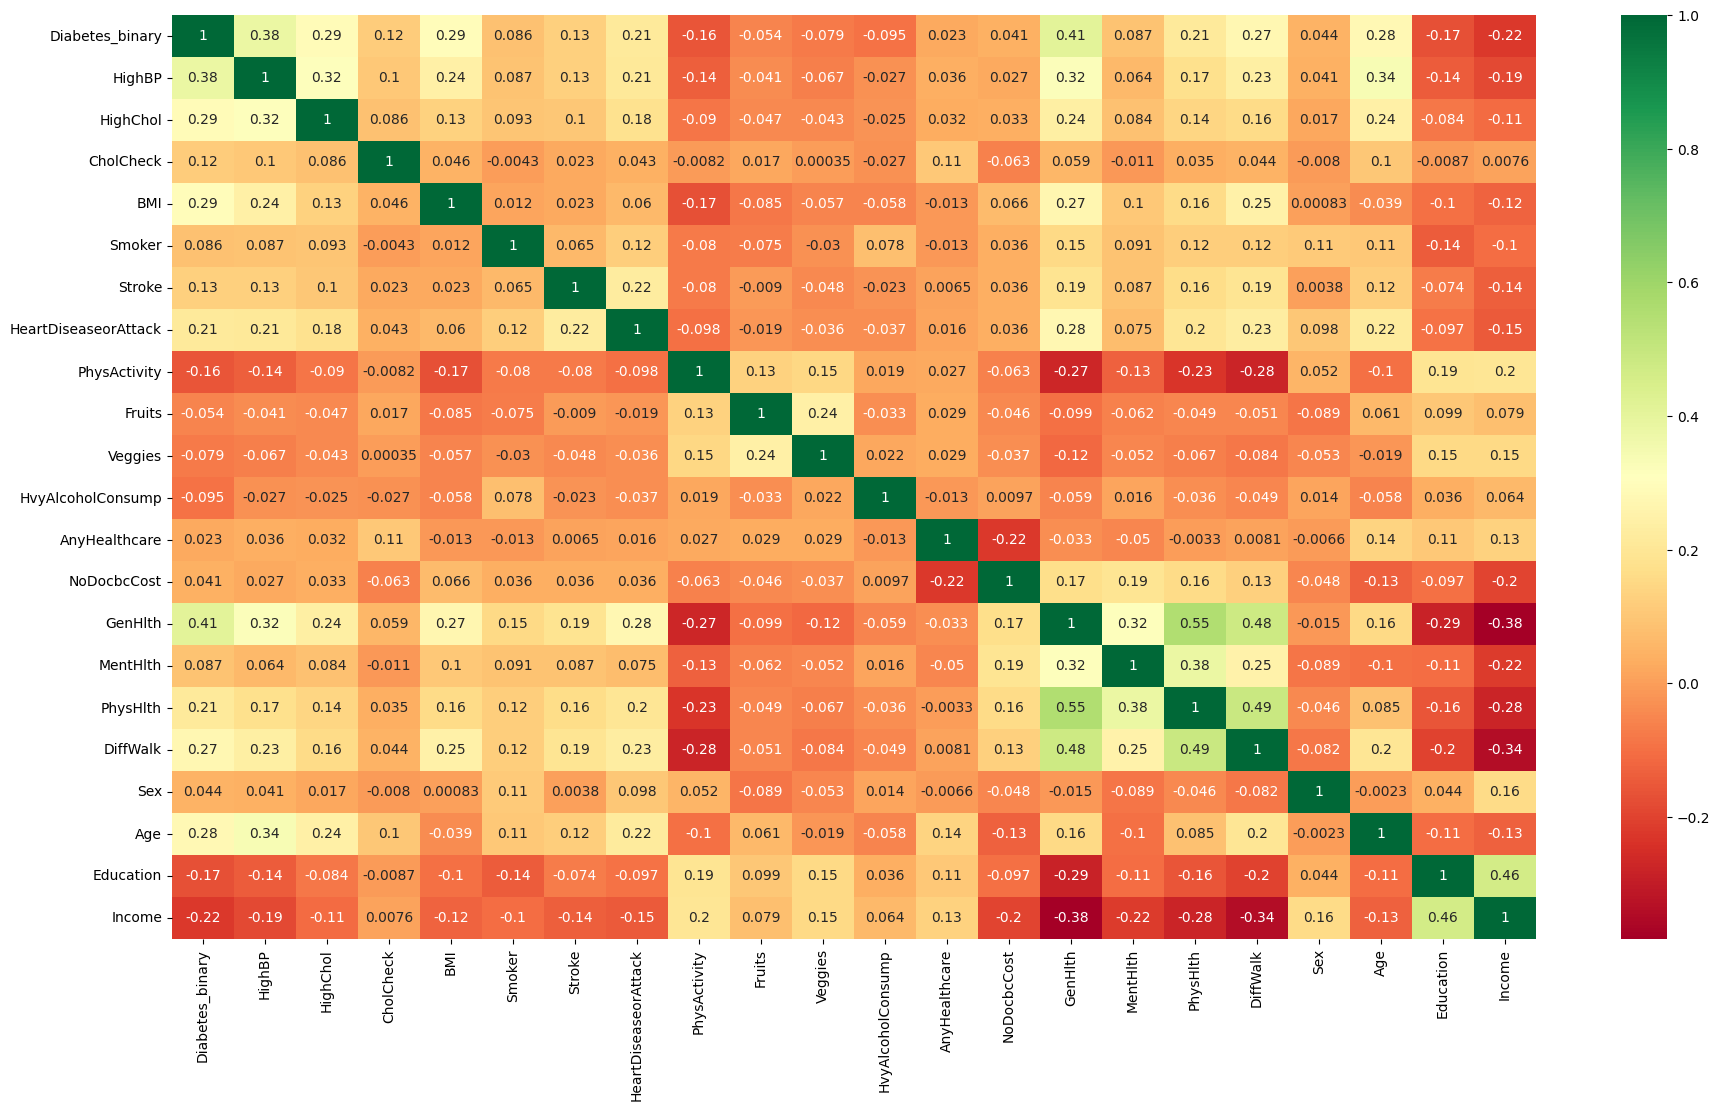

In [12]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(22,12))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
# plt.savefig('graph1.png', dpi=300, bbox_inches='tight')

### Distribution of all the features in their respective ranges

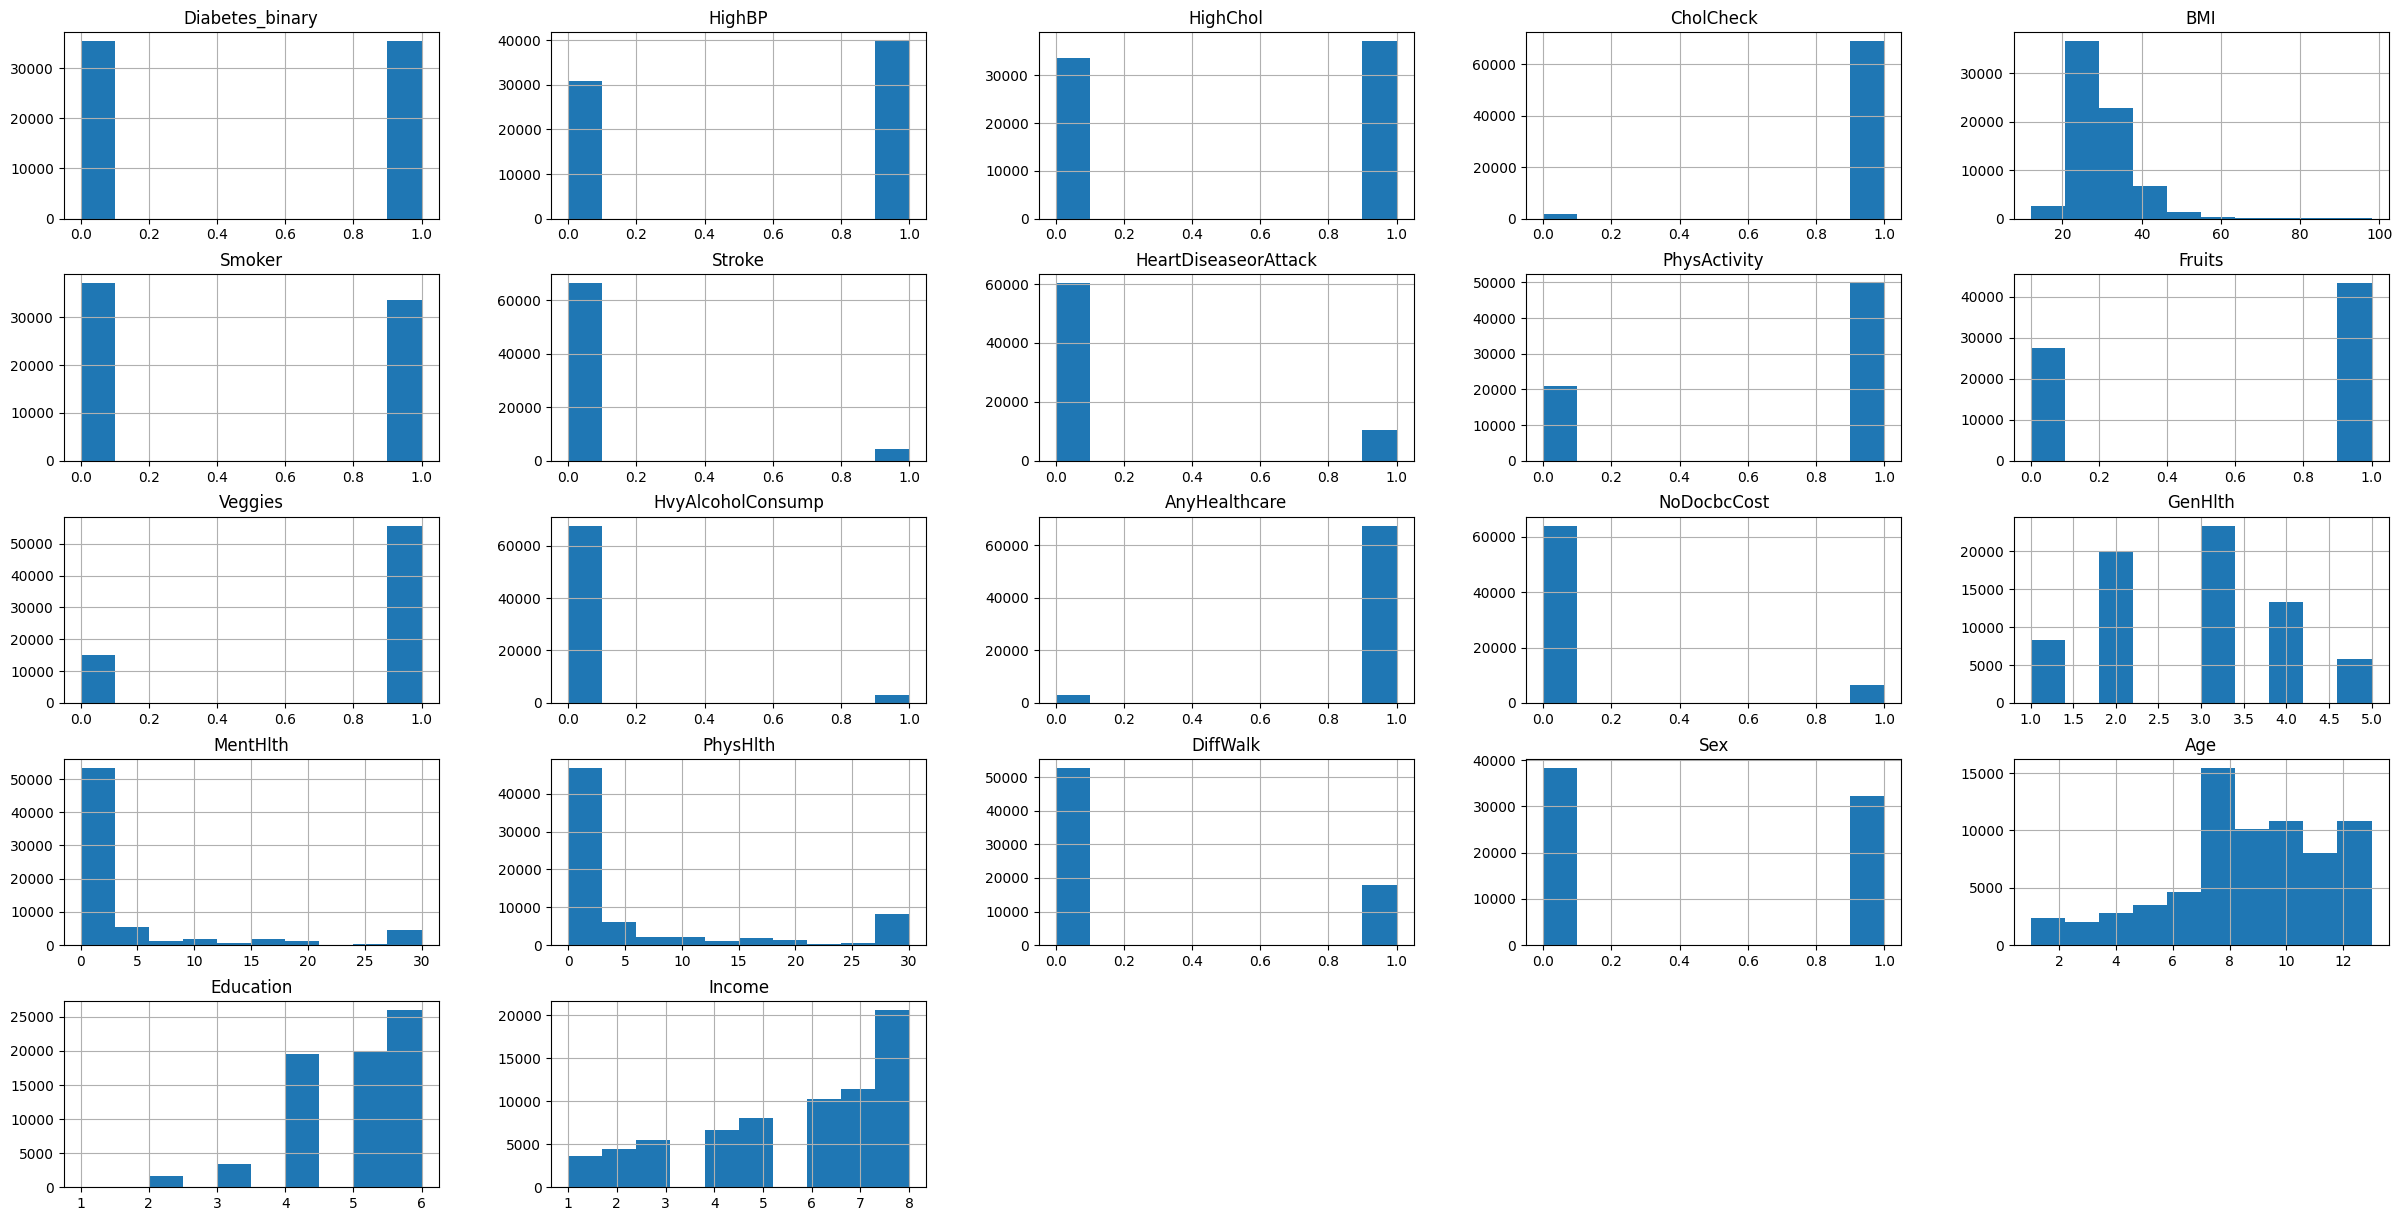

In [13]:
df.hist(figsize=(30, 15))
plt.show()

## Interpreting the data

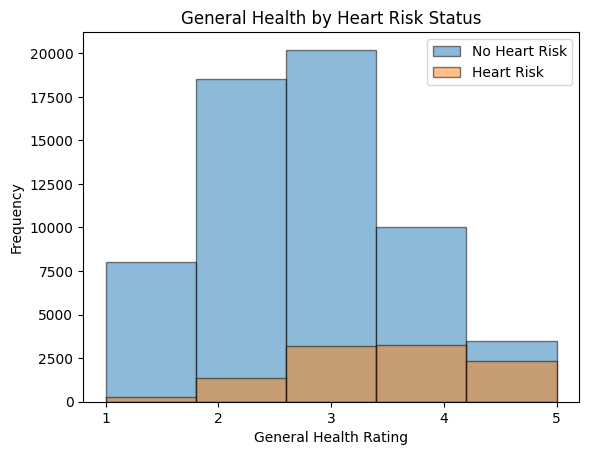

In [14]:
gen_health_no_heartRisk = df[df["HeartDiseaseorAttack"] == False]["GenHlth"]
gen_health_with_heartRisk = df[df["HeartDiseaseorAttack"] == True]["GenHlth"]
plt.hist(gen_health_no_heartRisk, bins=5, alpha=0.5, label="No Heart Risk", edgecolor="black")
plt.hist(gen_health_with_heartRisk, bins=5, alpha=0.5, label="Heart Risk", edgecolor="black")
plt.legend()
plt.title("General Health by Heart Risk Status")
plt.xlabel("General Health Rating")
plt.ylabel("Frequency")
plt.xticks(range(1, 6))
plt.show()

* The above graph shows how general health is related to the risk of heart attack risk

### Checking whether the classes are balanced

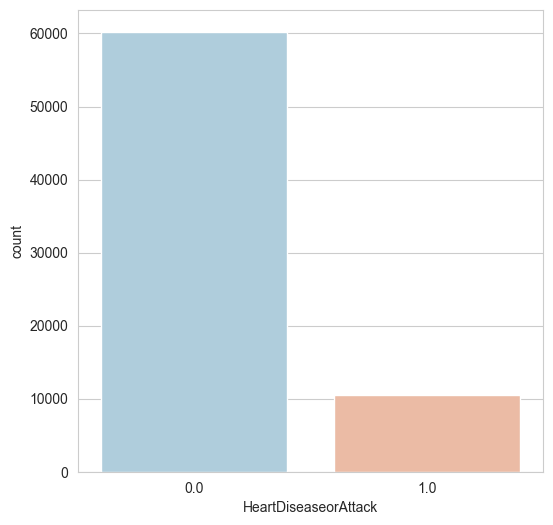

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(6, 6)) 
sns.countplot(x='HeartDiseaseorAttack', data=df, hue='HeartDiseaseorAttack', palette='RdBu_r', legend=False)
plt.show()

* As it can be seen the data is unbalanced that can impact model's accuracy

## Using SMOTE Analysis

In [16]:
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

* Now we can use X_resampled and y_resampled for training our machine learning model

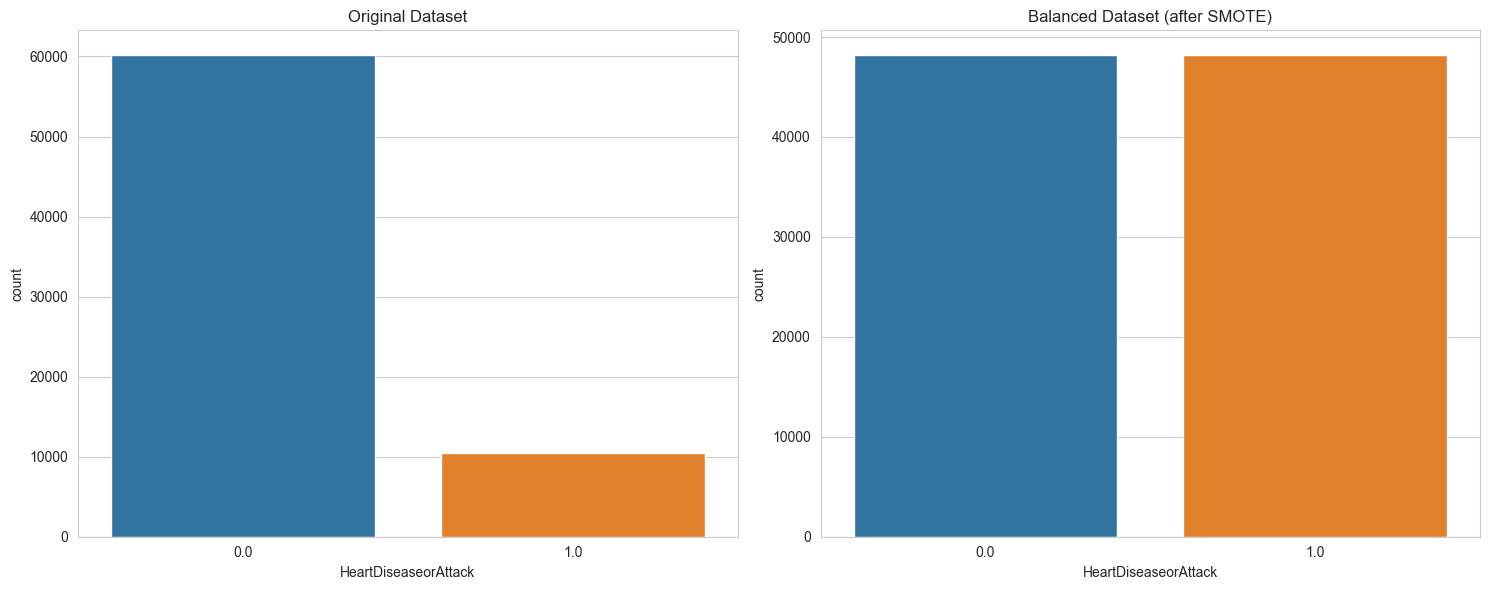

In [17]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x='HeartDiseaseorAttack', hue='HeartDiseaseorAttack',data=df, ax=axes[0],legend=False)
axes[0].set_title('Original Dataset')

sns.countplot(x=y_resampled,hue=y_resampled, ax=axes[1],legend=False)
axes[1].set_title('Balanced Dataset (after SMOTE)')

plt.tight_layout()
plt.show()


In [18]:
print(f'X_resampled size: {X_resampled.shape} and y_resampled size: {y_resampled.shape}')

X_resampled size: (96494, 21) and y_resampled size: (96494,)


### Feature Importance before class balancing

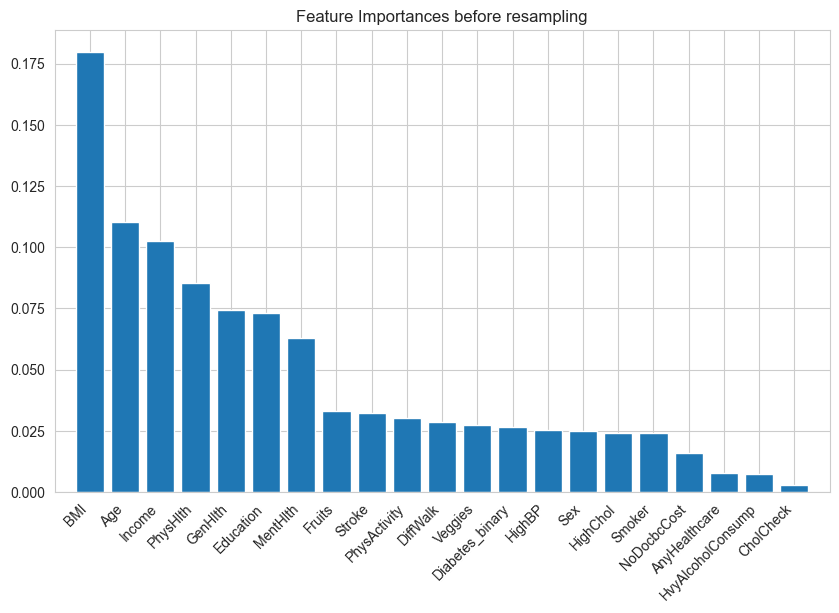

In [19]:
rf_unbalanced = RandomForestClassifier()

rf_unbalanced.fit(X, y)

importances_unb = rf_unbalanced.feature_importances_

indices_unb = np.argsort(importances_unb)[::-1]
plt.figure(figsize=(10,6))
plt.title("Feature Importances before resampling")
plt.bar(range(X.shape[1]), importances_unb[indices_unb], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices_unb], rotation=45, ha='right')
plt.xlim([-1, X.shape[1]])
plt.show()


### Feature importance after class balancing

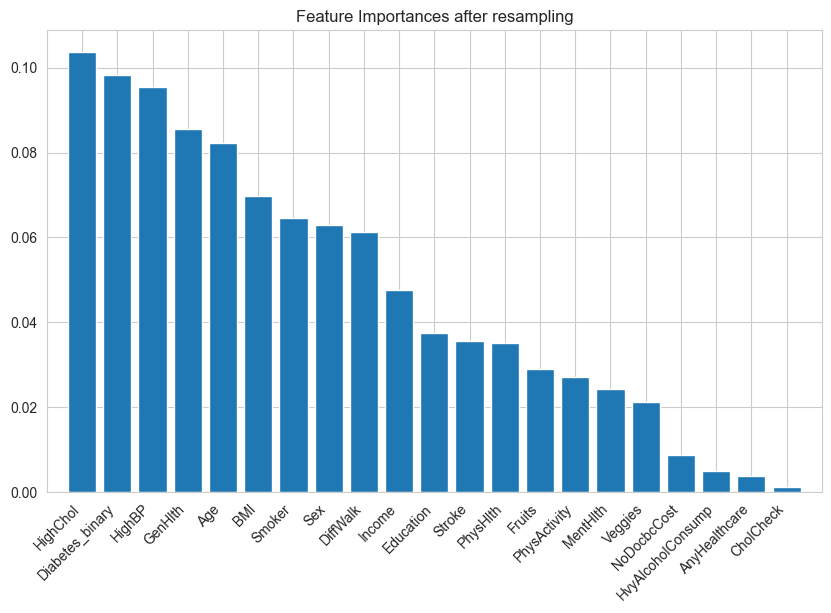

In [20]:
rf_balanced = RandomForestClassifier()
rf_balanced.fit(X_resampled, y_resampled)
importances_bal = rf_balanced.feature_importances_
indices_bal = np.argsort(importances_bal)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances after resampling")
plt.bar(range(X_resampled.shape[1]), importances_bal[indices_bal], align="center")
plt.xticks(range(X_resampled.shape[1]), X_resampled.columns[indices_bal], rotation=45, ha='right')
plt.xlim([-1, X_resampled.shape[1]])
plt.show()


## Model Training

### Model trained before class balancing

In [22]:
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier_imbalanced = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier_imbalanced.fit(X_train_imb, y_train_imb)

RandomForestClassifier(random_state=42)

## After balancing

In [23]:
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

rf_classifier_bal = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier_bal.fit(X_train_bal, y_train_bal)

RandomForestClassifier(random_state=42)

### Testing Model Accuracy before class balancing

In [24]:
y_pred_imb = rf_classifier_imbalanced.predict(X_test_imb)
print("Classification Report:")
report_imb = classification_report(y_test_imb, y_pred_imb)
print(report_imb)

print("Confusion Matrix:")
cm_imbalance = confusion_matrix(y_test_imb, y_pred_imb)
print(cm_imbalance)

accuracy_imb = accuracy_score(y_test_imb, y_pred_imb)
print(f"Accuracy: {accuracy_imb:0.4f}")


Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     11996
         1.0       0.50      0.16      0.24      2143

    accuracy                           0.85     14139
   macro avg       0.68      0.56      0.58     14139
weighted avg       0.81      0.85      0.81     14139

Confusion Matrix:
[[11659   337]
 [ 1805   338]]
Accuracy: 0.8485


### Testing Model Accuracy after class balancing

In [25]:
y_pred_bal = rf_classifier_bal.predict(X_test_bal)

print("Classification Report:")
report_bal = classification_report(y_test_bal, y_pred_bal)
print(report_bal)

print("Confusion Matrix:")
cm_balance = confusion_matrix(y_test_bal, y_pred_bal)
print(cm_balance)

accuracy_bal = accuracy_score(y_test_bal, y_pred_bal)
print(f"Accuracy: {accuracy_bal:0.4f}")


Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      9744
         1.0       0.96      0.87      0.91      9555

    accuracy                           0.92     19299
   macro avg       0.92      0.92      0.92     19299
weighted avg       0.92      0.92      0.92     19299

Confusion Matrix:
[[9393  351]
 [1257 8298]]
Accuracy: 0.9167


# Plotting the Evaluation Metrics

### Confusion matrix for test data before class balancing

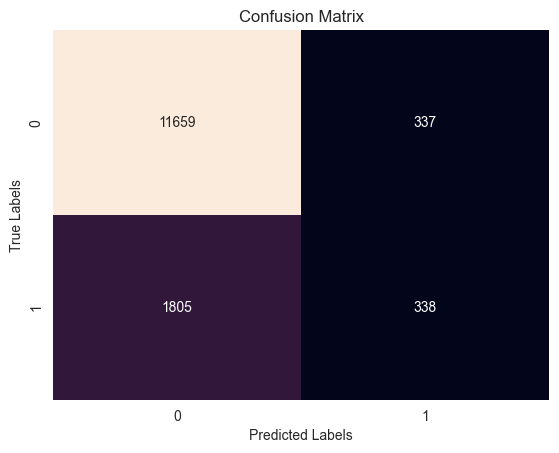

In [26]:
sns.heatmap(cm_imbalance, annot=True, fmt="d", cbar = False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('graph4.png', dpi=300, bbox_inches='tight')
plt.show()


### Confusion Matrix for Test Data after class balancing

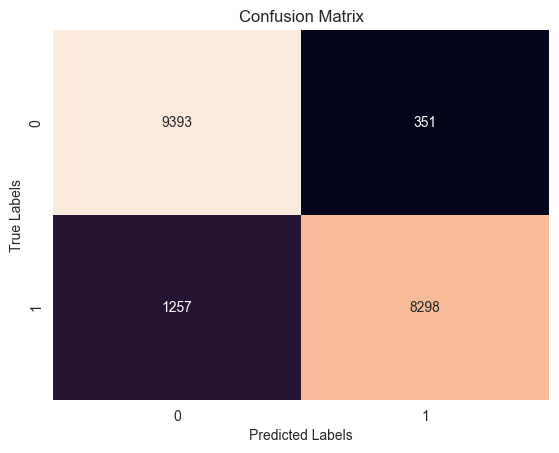

In [27]:
sns.heatmap(cm_balance, annot=True, fmt="d", cbar = False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('graph3.png', dpi=300, bbox_inches='tight')
plt.show()


# Gradient Boost

### Gradient Boost on unbalanced data

In [28]:
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
gb_clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [30]:
gb_clf_gb.fit(X_train_imb, y_train_imb)


GradientBoostingClassifier(random_state=42)

In [31]:
y_pred_gb = gb_clf_gb.predict(X_test_gb)

In [32]:
print("Classification Report:")
report_Boost_gb_imb = classification_report(y_test_imb, y_pred_gb)
print(report_Boost_gb_imb)

print("Confusion Matrix:")
cm_boost_imb_gb = confusion_matrix(y_test_gb, y_pred_gb)
print(cm_boost_imb_gb)

accuracy_boost_imb_gb = accuracy_score(y_test_gb, y_pred_gb)
print(f"Accuracy: {accuracy_boost_imb_gb:0.4f}")


Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     11996
         1.0       0.60      0.17      0.27      2143

    accuracy                           0.86     14139
   macro avg       0.74      0.58      0.60     14139
weighted avg       0.83      0.86      0.82     14139

Confusion Matrix:
[[11749   247]
 [ 1770   373]]
Accuracy: 0.8573


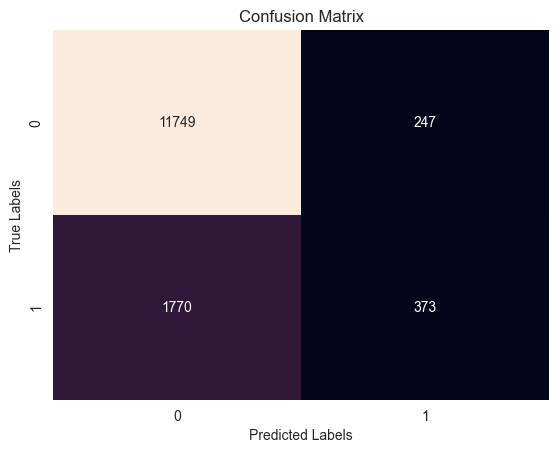

In [33]:
sns.heatmap(cm_boost_imb_gb, annot=True, fmt="d", cbar = False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('graph8.png', dpi=300, bbox_inches='tight')
plt.show()


### Gradient Boost on resampled data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [35]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [36]:
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [37]:
y_pred = gb_clf.predict(X_test)

In [38]:
print("Classification Report:")
report_Boost = classification_report(y_test, y_pred)
print(report_Boost)

print("Confusion Matrix:")
cm_boost = confusion_matrix(y_test, y_pred)
print(cm_boost)

accuracy_boost = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_boost:0.4f}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      9744
         1.0       0.94      0.86      0.90      9555

    accuracy                           0.91     19299
   macro avg       0.91      0.91      0.91     19299
weighted avg       0.91      0.91      0.91     19299

Confusion Matrix:
[[9232  512]
 [1310 8245]]
Accuracy: 0.9056


### Confusion matrix Boosting

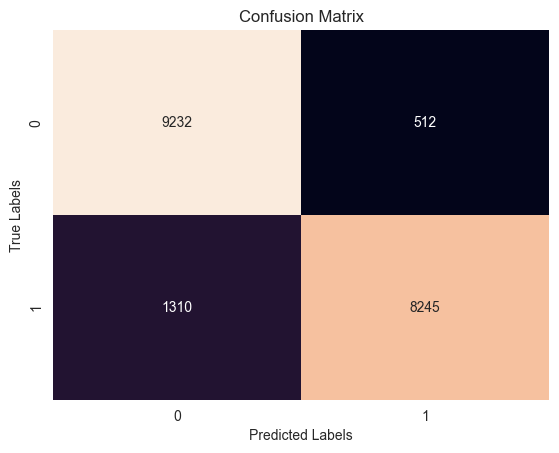

In [39]:
sns.heatmap(cm_boost, annot=True, fmt="d", cbar = False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('graph6.png', dpi=300, bbox_inches='tight')
plt.show()


### Checking Non Linearity Relationship

In [41]:
X = df.drop(columns=['HeartDiseaseorAttack']) 
y = df['HeartDiseaseorAttack'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
degrees = [2, 3]  # Polynomial degrees to try
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    X_test_poly = poly.transform(X_test)
    y_pred = model.predict(X_test_poly)
    
    mse = mean_squared_error(y_test, y_pred)
    print(f"Polynomial degree {degree} - Mean Squared Error: {mse}")


Polynomial degree 2 - Mean Squared Error: 0.10323723924709281
Polynomial degree 3 - Mean Squared Error: 0.10595381016897593


* This implies that this model is prone to overfitting as well after balancing as the MSE for degree 2 and MSE for degree 3 are almost equal suggesting that 21 features overfits data as after hyperparameter tuning the model accuracy went down.

# END OF FILE